In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

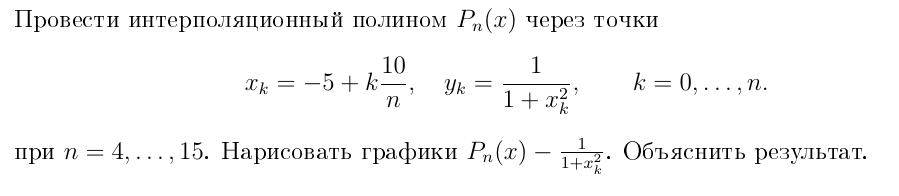

In [2]:
Image('task 5.png')

In [21]:
N = np.arange(4, 16)

get_x = lambda k, n: -5 + 10 * k / n
get_y = lambda x: 1 / (1 + pow(x, 2))

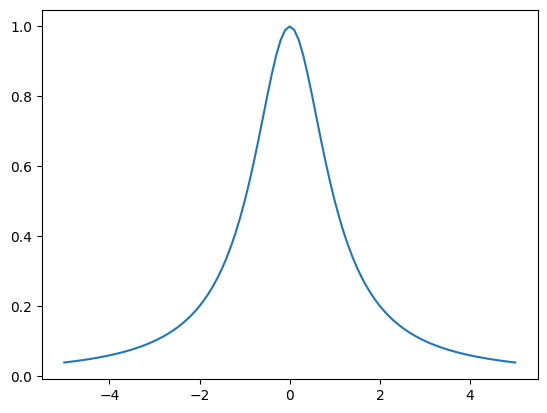

In [22]:
n = 100

k = np.arange(0, n+1)
x = get_x(k, n)
y = get_y(x)
plt.plot(x, y)

In [23]:
def ddiff(x, y):
    diffs = np.copy(y)
    for i in np.arange(1, len(y)):
        diffs[i:] = (diffs[i:] - diffs[i - 1]) / (x[i:] - x[i - 1])
    return diffs

In [24]:
def Horner(n, x, x_src, y_src):
    coeff = ddiff(x_src, y_src)
    polynomial = coeff[n]
    for i in np.arange(1, n + 1):
        polynomial = coeff[n - i] + (x - x_src[n - i]) * polynomial
    return polynomial

In [28]:
points_x = []
points_y = []
P_n = []
sub_n = []

a = -5
b = 5
M = 100
x = np.linspace(a, b, M)

for n in N:
    k = np.arange(n+1)
    xk = get_x(k, n)
    yk = get_y(xk)
    points_x += [xk]
    points_y += [yk]
    P_n += [[Horner(n, t, xk, yk) for t in x]]
    sub_n += [P_n[-1] - get_y(x)]

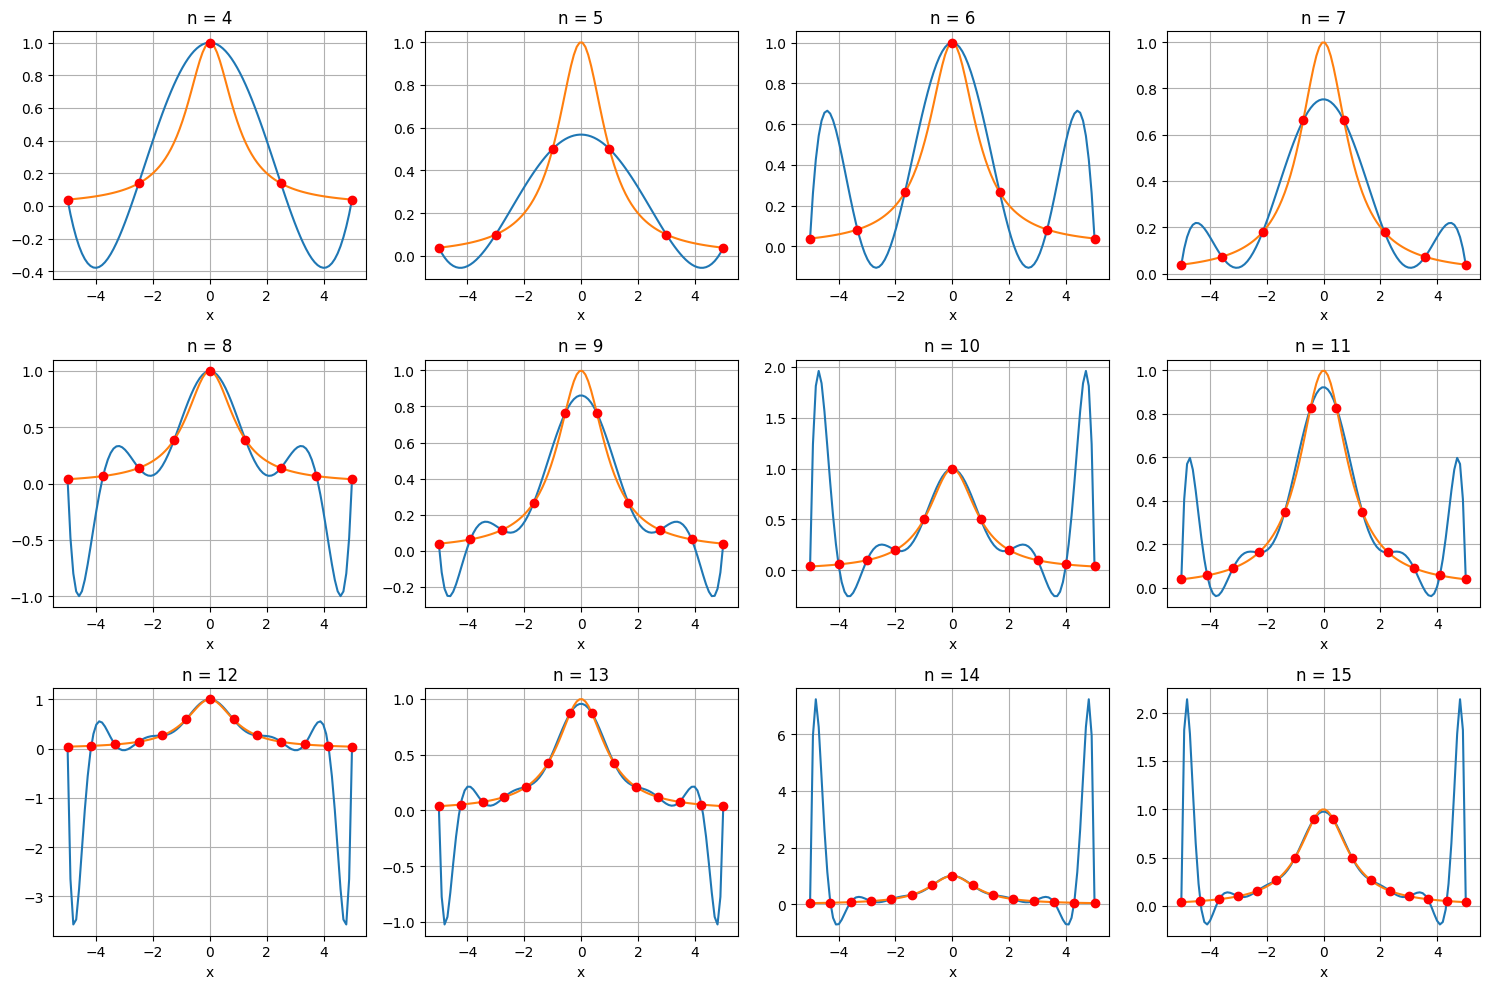

In [29]:
plt.figure(figsize=(15,10))

for n in N:
    plt.subplot(3, 4, n - N[0] + 1)

    plt.plot(x, P_n[n-4], label=r'$P_{'+str(n)+'}$')
    plt.plot(x, get_y(x), label='func')
    plt.plot(points_x[n-4], points_y[n-4], 'ro', label='Interpolation points')

    plt.xlabel('x')
    plt.title('n = '+ str(n))
    plt.grid()

plt.tight_layout()
plt.show()

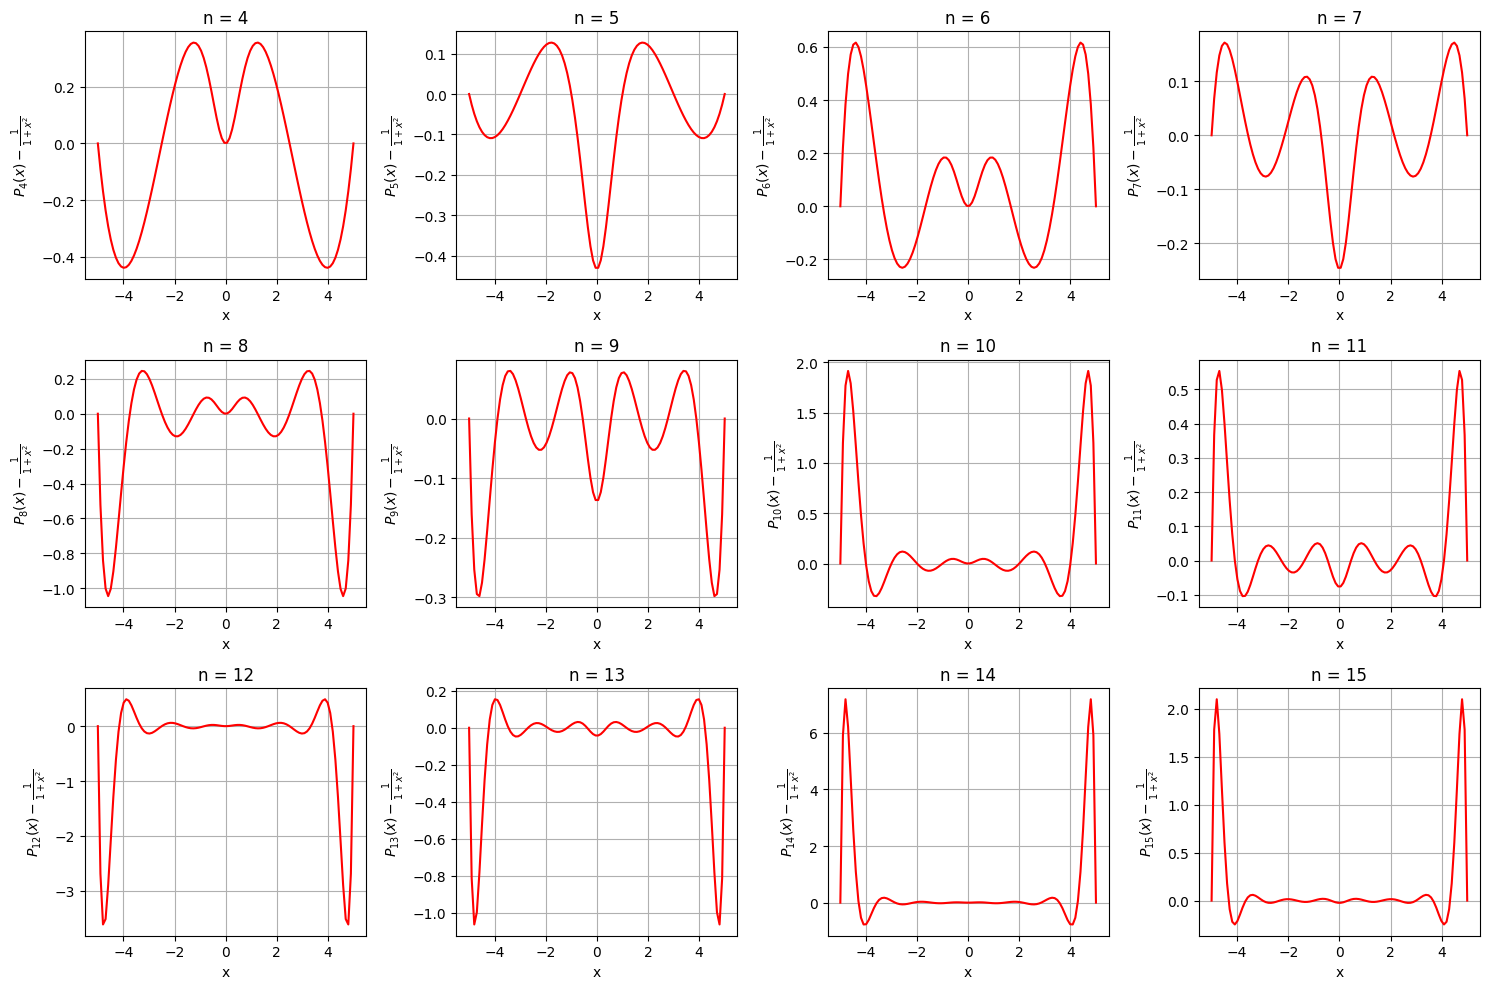

In [30]:
plt.figure(figsize=(15,10))

for n in N:
    plt.subplot(3, 4, n - N[0] + 1)
    plt.plot(x, sub_n[n - 4], 'r-')
    plt.xlabel('x')
    plt.ylabel(r'$P_{'+str(n)+'}(x) - \\frac{1}{1+x^2}$')
    plt.title('n = '+ str(n))
    plt.grid()

plt.tight_layout()
plt.show()

Runge's phenomenon